# Preliminary Analysis for the Apple iOS Apps

## Data

Data was extracted from the iTunes Search API in July 2017. This dataset contains information of over 7000 Apple iOS mobile applications. Data was obtained from [kaggle](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

This study assumes it is representative of the iOS App population. The dataset consists of two tables, AppleStore and appleStore_description. 

The AppleStore file contains App ID, App name, size, currency, price, user rating counts for all versions, user rating counts for the current version, average user rating for all versions, average user rating for the current version, latest version code, content rating, primary genre, number of supporting devices, number of screenshots showed for display, number of supported languages, and Vpp device based licensing enabled. The second table provides detailed description for the Apps included in the first table.

### Data Exploration 

To explore this dataset, we first checked the cardinality of the variables of interest. Except for two rating count variables, other categorical and numeric variables present relatively low cardinality, ranging from 4 to 57. Then we examined numeric variables and categorical variables, respectively. 

In [58]:
#Import libraries 
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
%matplotlib inline

#Read in data files 
t1 = pd.read_csv("AppleStore.csv", index_col=0)
t2 = pd.read_csv("appleStore_description.csv")

ntot = len(t1)

#Glance at the data structure
app = pd.DataFrame(t1)
app.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [30]:
#Variable type and cardinality 
var = ['price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num']
type = ['numeric', 'numeric', 'numeric', 'numeric', 'numeric', 
        'ordinal', 'categorical', 'numeric', 'numeric', 'numeric']
cardinality = [len(np.unique(app['price'])), len(np.unique(app['rating_count_tot'])), len(np.unique(app['rating_count_ver'])),
        len(np.unique(app['user_rating'])), len(np.unique(app['user_rating_ver'])), len(np.unique(app['cont_rating'])), len(np.unique(app['prime_genre'])),
        len(np.unique(app['sup_devices.num'])), len(np.unique(app['ipadSc_urls.num'])), len(np.unique(app['lang.num']))
       ]

table = list(zip(var, type, cardinality))
pd.DataFrame(table, columns=['var', 'type', 'cardinalitiy'])

,var,type,cardinalitiy
0,price,numeric,36
1,rating_count_tot,numeric,3185
2,rating_count_ver,numeric,1138
3,user_rating,numeric,10
4,user_rating_ver,numeric,10
5,cont_rating,ordinal,4
6,prime_genre,categorical,23
7,sup_devices.num,numeric,20
8,ipadSc_urls.num,numeric,6
9,lang.num,numeric,57


Summary statistics for numeric variables are presented below. As we can see, most Apps are free or cheap with \\$1.99 at the 75th percentile. However, an educational App LAMP Words For Life is priced at \$ 299.99. The average total rating count is 12,893 with a large standard deviation of 75,734, the median is 300, the maximum total rating count is 2,974,676 for Facebook. In terms of user rating, average user rating for all versions is higher than user rating for the current version, 3.53 vs. 3.25 on a 0-5 scale. On average, these Apps can support 5 languages, however, the maximum reaches to 75 languages! Curious to know, this app is Google Photos. 

In [5]:
app.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [35]:
app[app['rating_count_tot'] == 2.974676e+06]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
17,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1


In [6]:
app[app['price']>299]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1714,551215116,LAMP Words For Life,583263232,USD,299.99,41,0,4.0,0.0,1.5.5,4+,Education,24,5,1,1


In [7]:
app[app['lang.num']==75]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4130,962194608,Google Photos - unlimited photo and video storage,160215040,USD,0.0,88742,1145,5.0,5.0,2.17.0,4+,Photo & Video,37,5,75,1


Two categorical variables in the dataset are primary genre and content rating (ordinal). There are 23 genres with the majority in games, followed by entertainment, education, photo & video, utilities, and health & fitness.

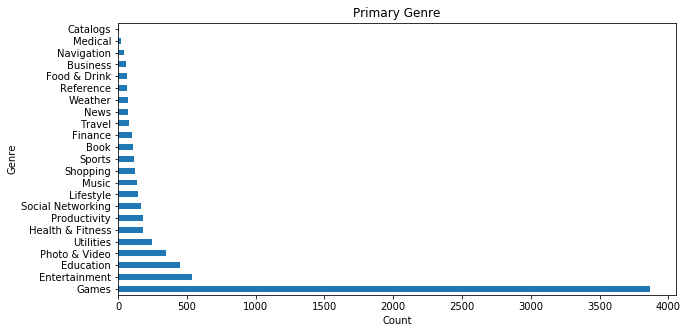

In [37]:
#Genre distribution
plt.figure(figsize=(10,5))
app['prime_genre'].value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Primary Genre')
plt.show()

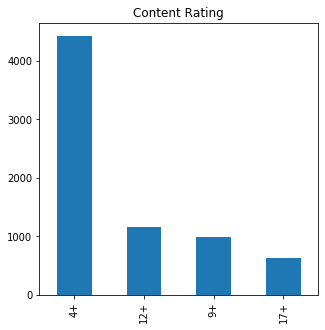

In [9]:
#Content rating 
plt.figure(figsize=(5,5))
app['cont_rating'].value_counts().plot(kind='bar')
plt.title('Content Rating')
plt.show()

There are four content ratings and most of them are 4+, followed by 12+, 9+, and 17+. 

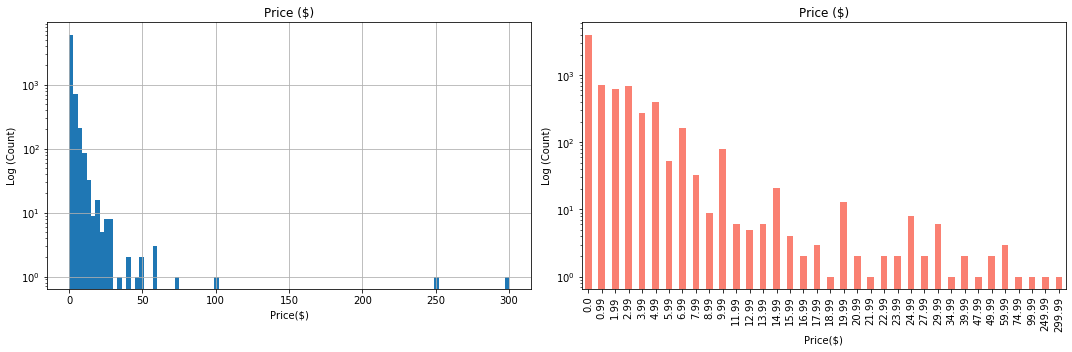

In [10]:
#Price 
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
p1 = app['price'].hist(bins=100)
p1.set(xlabel='Price($)', ylabel='Log (Count)')
plt.yscale('log')
plt.title('Price ($)')

plt.subplot(1,2,2)
price = np.unique(app['price'])
p2 = app['price'].value_counts().loc[price].plot(kind='bar', color='salmon')
p2.set(xlabel='Price($)', ylabel='Log (Count)')
plt.yscale('log')
plt.title('Price ($)', fontsize=12)

plt.tight_layout()
plt.show()

Taking a closer look at the numeric variables, as we can see from the descrptive statistics, price is very skewed. In order to see the trend better, we used log (count) on the y-axis. Majority of the prices are clustered within \\$0 - \$9.99. 

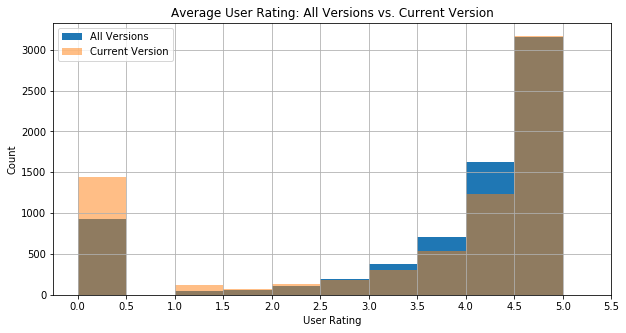

In [11]:
#User rating 
plt.figure(figsize=(10,5))

p1 = app['user_rating'].hist(bins=10, alpha=1.0, label='All Versions')
p2 = app['user_rating_ver'].hist(bins=10, alpha=0.5, label='Current Version')

plt.xlabel('User Rating')
plt.ylabel('Count')
plt.xticks(np.arange(0,6,0.5))
plt.title('Average User Rating: All Versions vs. Current Version')
plt.legend(loc='upper left')

plt.show()

Comparing user rating for all versions and the current version, there are more ratings within 0-0.5, 1-1.5, and 2-2.5 for the current version, while there are more ratings within 2.5-4.5 for all versions. There are slightly more ratings in 4.5-5 for the current version. 

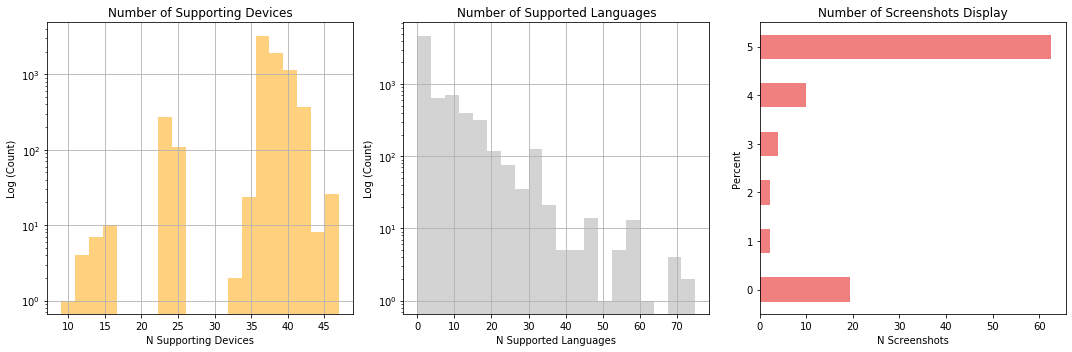

In [55]:
#Number of supporting devices
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
p1 = app['sup_devices.num'].hist(bins=20, color='orange', alpha=0.5)
p1.set(xlabel='N Supporting Devices', ylabel='Log (Count)')
plt.title('Number of Supporting Devices')
plt.yscale('log')

#Number of supported languages
plt.subplot(1,3,2)
p2 = app['lang.num'].hist(bins=20, color='lightgrey')
p2.set(xlabel='N Supported Languages', ylabel='Log (Count)')
plt.title('Number of Supported Languages')
plt.yscale('log')

#Number of screenshots showed for display 
plt.subplot(1,3,3)
sc = np.unique(app['ipadSc_urls.num'])
p3 = (app['ipadSc_urls.num'].value_counts()/ntot*100).loc[sc].plot(kind='barh', color='lightcoral')
p3.set(xlabel='N Screenshots', ylabel='Percent')
plt.title('Number of Screenshots Display')

plt.tight_layout()
plt.show()

As can be seen from the plot for number of supporting devices, it follows a trimodal distribution. There are two obvious gaps between three clusters. One is between 9-16 and 23-26, the other is between 23-26 and 33-47. The three clusters could be iWatch, iPad, and iPhone. The biggest peak occurs at 37. In terms of number of supported languages, it is a blend of both multimodal and logrithmatic distributions, with a peak of 1 and then dramatically drops down, then peak occurs at 30, 58, and 69. Most iOS Apps use English as the primary language. Number of screenshots display follows a bimodal distribution with the peak of 5 and 0 at the two ends. 

## Analytic Questions 
Preliminary analysis was oriented by the following analytic questions.
### 1. What are the most popular iOS Apps in the Apple store? How do their characteristics compare to other Apps? 

We identified Top100 Apps based on total rating counts. For your information, the Top10 popular Apps are: Facebook, Instagram, Clash of Clans, Temple Run, Pandora, Pinterest, Bible, Candy Crush Saga, Spotify, and Angry Birds. How many of them are on your iOS devices? 

In [13]:
#Create datasets for the Top100 and Others 
top = pd.DataFrame(app.sort_values('rating_count_tot', ascending=False).head(100))
ntop=100
top.head(10)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
17,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
591,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
1561,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
810,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
8,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
863,429047995,Pinterest,74778624,USD,0.0,1061624,1814,4.5,4.0,6.26,12+,Social Networking,37,5,27,1
5,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
1731,553834731,Candy Crush Saga,222846976,USD,0.0,961794,2453,4.5,4.5,1.101.0,4+,Games,43,5,24,1
202,324684580,Spotify Music,132510720,USD,0.0,878563,8253,4.5,4.5,8.4.3,12+,Music,37,5,18,1
310,343200656,Angry Birds,175966208,USD,0.0,824451,107,4.5,3.0,7.4.0,4+,Games,38,0,10,1


We first created a dataset contains all Apps excluding the Top100 Apps. And then we created a binary variable 'popular' indicating popularity based on total rating counts. 

In [14]:
#Create others dataset 
others = pd.DataFrame(app.sort_values('rating_count_tot', ascending=True).head(7098))
nothers=7098

#Create a new binary variable: popular
top['popular'] = 1
others['popular'] = 0

In [15]:
relative_diff = (top.describe() - others.describe()) / others.describe()
#Keep vars of interest 
relative_diff.drop(columns = ['id', 'rating_count_tot', 'rating_count_ver',
                              'size_bytes', 'vpp_lic', 'popular'])

,price,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num
count,-0.985912,-0.985912,-0.985912,-0.985912,-0.985912,-0.985912
mean,-0.880457,0.211365,0.308728,0.003729,0.080160,1.246439
std,-0.858585,-0.659151,-0.638284,-0.119881,-0.110156,0.405930
min,NaN,inf,NaN,0.333333,NaN,inf
25%,NaN,0.142857,1.000000,0.000000,0.333333,0.750000
50%,NaN,0.125000,0.125000,0.000000,0.000000,9.000000
75%,-1.000000,0.000000,0.000000,0.000000,0.000000,1.031250
max,-0.976699,0.000000,0.000000,-0.085106,0.000000,-0.400000


To compare the Top100 and other Apps, relative differences in statistics were examined. As we can see from the table above, on average, price of the Top100 Apps is 88% cheaper than others; user rating for all versions and the current version of the Top100 Apps are 21% and 31% higher than other Apps, respectively; number of screenshots of the Top100 Apps is 8% more than other Apps; number of supported languages of the Top100 Apps is 1.25 times more than others. In terms of number of supporting devices, the difference of 0.4% is insignificant. 

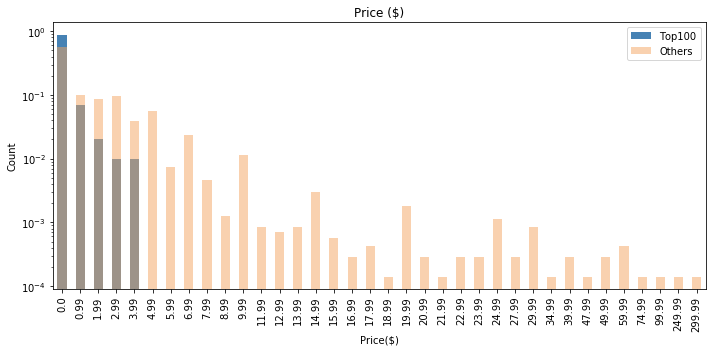

In [16]:
#Price
plt.figure(figsize=(10,5))

#plt.subplot(1,2,2)
top_price = np.unique(top['price'])
others_price = np.unique(others['price'])
p1 = (top['price'].value_counts()/ntop).loc[top_price].plot(kind='bar', color='steelblue', alpha=1.0, label='Top100')
p2 = (others['price'].value_counts()/nothers).loc[others_price].plot(kind='bar', color='sandybrown', alpha=0.5, label='Others')

plt.xlabel('Price($)')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Price ($)')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

First of all, let's take a look at price. Among these Top100 Apps, all of them are free or no more than \\$3.99. The reason could be \\$3.99 is a reasonal amount of money that people feel comfortable to spend on an App. Because it is \\$1 away from a five dollar bill,  psychologically it feels less expensive. 

In [17]:
#Top100
top_genre = pd.value_counts(top['prime_genre']).reset_index()
top_genre.columns = ['genre', 'pct_Top100']

#Others
others_genre = pd.value_counts(others['prime_genre']).reset_index()
others_genre.columns = ['genre', 'Others']
others_genre['pct_Others'] = round(others_genre['Others']/nothers*100, 0)

comp = pd.merge(top_genre, others_genre, on='genre', how='outer')
#Hobson: I decided to use this equation rather than Top100/Others to show direction of differences
comp['relative_diff'] = (comp['pct_Top100'] - comp['pct_Others']) / comp['pct_Others']
comp = comp.drop(columns=['Others']).sort_values(by=['relative_diff'], ascending=False)
#comp

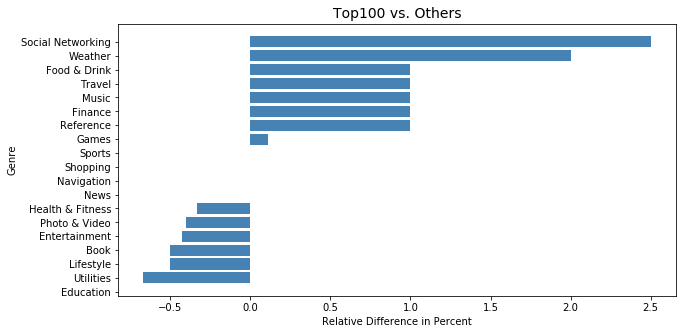

In [48]:
plt.figure(figsize=(10,5))
plt.barh('genre', 'relative_diff', data=comp, align='center', color='steelblue')
plt.title ('Top100 vs. Others', fontsize=14)
plt.xlabel('Relative Difference in Percent')
plt.ylabel('Genre')
plt.gca().invert_yaxis()

plt.show()

With respect to primary genre, in comparison, there are 2.5 times more social networking Apps among the Top100 than other Apps, 2 times more weather Apps, and there are 1 time more reference, food & drink and music Apps among the Top100 than other Apps. There are similar percent of Apps in games, sports, shopping, navigation, and news in Top100 and Others. However, among Top100 Apps, fewer are in health & fitness, photo & video, entertainment, lifestyle, book, and utilities. There is no App in education, productivity, business, medical, and catalogs in the Top100 group.  

In [50]:
#Top100
top_cont = pd.value_counts(top['cont_rating']).reset_index()
top_cont.columns = ['cont', 'pct_Top100']

#Others
others_cont = pd.value_counts(others['cont_rating']).reset_index()
others_cont.columns = ['cont', 'Others']
others_cont['pct_Others'] = round(others_cont['Others']/nothers*100, 0)

comp_cont = pd.merge(top_cont, others_cont, on='cont', how='outer')
comp_cont['relative_diff'] = (comp_cont['pct_Top100']-comp_cont['pct_Others'])/comp_cont['pct_Others']
comp_cont = comp_cont.drop(columns=['Others']).sort_values(by=['relative_diff'], ascending=False)
#comp_cont

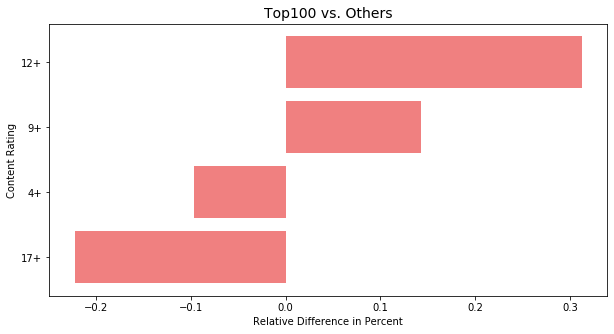

In [51]:
plt.figure(figsize=(10,5))
plt.barh('cont', 'relative_diff', data=comp_cont, align='center', color='lightcoral')
plt.title ('Top100 vs. Others', fontsize=14)
plt.xlabel('Relative Difference in Percent')
plt.ylabel('Content Rating')
plt.gca().invert_yaxis()

plt.show()

In terms of content rating, there is about 10% less 4+ Apps and 24% less 17+ Apps in the Top100 than other Apps. However, there are 31% more 12+ Apps and 14% more 9+ Apps in the Top100 than other Apps. The reason could be 9+ and 12+ are less content restricted than 17+. Although 4+ is least content restricted, it tends to target at a smaller market composed of children and parents (e.g., The Dance of the Little Water Drops). 

In [21]:
print(np.mean(top['user_rating']), np.mean(top['user_rating_ver']))
print(round(np.mean(others['user_rating']),2), round(np.mean(others['user_rating_ver']),2))

4.26 4.24
3.52 3.24


In general, these Top100 Apps have relatively higher user ratings. Comparing to other Apps, on average, all versions are rated 0.74 point higher, and the current version is rated 1 point higher. Users are more satisfied with these Top100 Apps.  

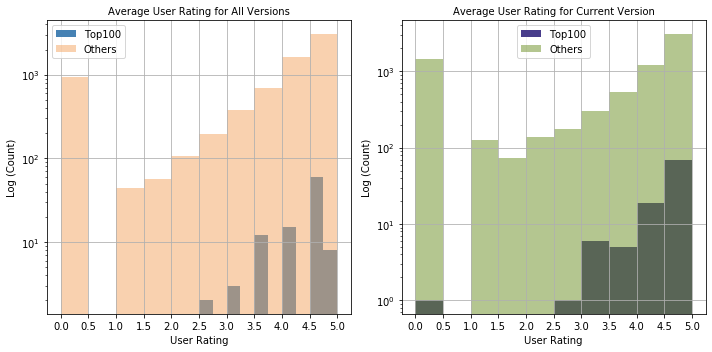

In [22]:
#User rating
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
p1 = top['user_rating'].hist(bins=10, alpha=1.0, label='Top100', color='steelblue')
p2 = others['user_rating'].hist(bins=10, alpha=0.5, label='Others', color='sandybrown')

plt.xlabel('User Rating')
plt.ylabel('Log (Count)')
plt.yscale('log')
plt.title('Average User Rating for All Versions', fontsize=10)
plt.xticks(np.arange(0,5.5,0.5))
plt.legend(loc='upper left')

plt.subplot(1,2,2)
p1 = top['user_rating_ver'].hist(bins=10, alpha=1.0, label='Top100', color='darkslateblue')
p2 = others['user_rating_ver'].hist(bins=10, alpha=0.5, label='Others', color='olivedrab')

plt.xlabel('User Rating')
plt.ylabel('Log (Count)')
plt.yscale('log')
plt.title('Average User Rating for Current Version', fontsize=10)
plt.xticks(np.arange(0,5.5,0.5))
plt.legend(loc='upper center')

plt.tight_layout()

plt.show()

As we can see from the plots, ratings for all versions and current version follow similar patterns. For all versions, all of the Top100 Apps are rated above 2.5 follwing a logrithmatic distribution with a majority of 4.5 (60%), while ratings for other Apps follow a bimodal distribution with peaks at 0 (13%) and 4.5 (37%). For the current version, similarly, all Top100 Apps are rated above 2.5 with the majority of 4.5 (60%) except that one App has a rating of 0. While ratings for other Apps follow a bimodal distribution with peaks at 0 (20%) and 4.5 (30%). In terms of the perfect rating, among the Top100 Apps, there are 8% Apps have a rating of 5 for both all versions and the current version. While among other Apps, there are 7% Apps have perfect rating for all versions and 13% for the current version. The popular Apps have less perfect ratings for the current version. The reason could be the new version breaks something in the App or users had higher expectation for the updated version and then realized it didn't improve much. 

In [41]:
top[top['user_rating_ver']==0]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,popular,rating_diff
1660,544007664,"YouTube - Watch Videos, Music, and Live Streams",124673024,USD,0.0,278166,0,2.5,0.0,12.21,17+,Photo & Video,37,4,34,1,1,-2.5


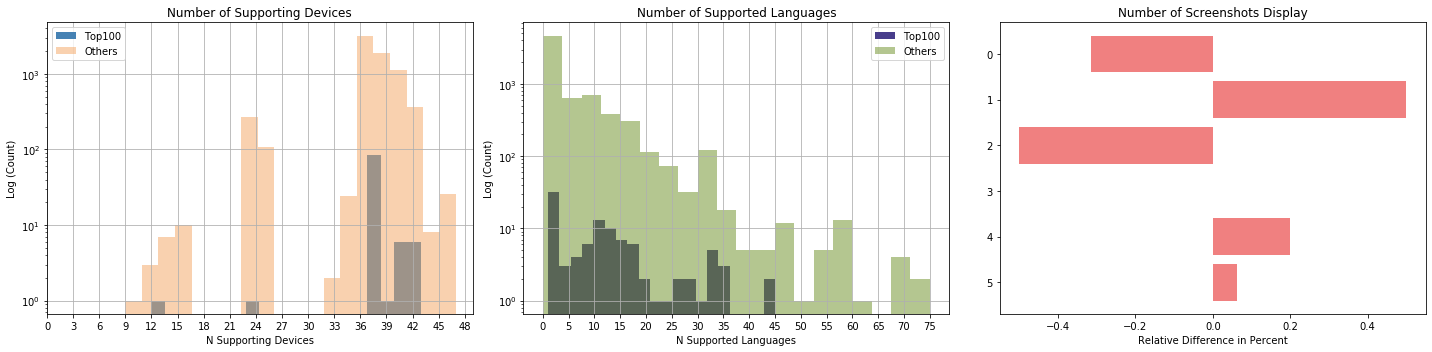

In [53]:
#Number of supporting devices
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
p1 = top['sup_devices.num'].hist(bins=20, color='steelblue', alpha=1.0, label='Top100')
p2 = others['sup_devices.num'].hist(bins=20, color='sandybrown', alpha=0.5, label='Others')

plt.xlabel('N Supporting Devices')
plt.ylabel('Log (Count)')
plt.yscale('log')
plt.xticks(np.arange(0,49,3))
plt.title('Number of Supporting Devices')
plt.legend(loc='upper left')

#Number of supported languages
plt.subplot(1,3,2)
p3 = top['lang.num'].hist(bins=20, color='darkslateblue', alpha=1.0, label='Top100')
p4 = others['lang.num'].hist(bins=20, color='olivedrab', alpha=0.5, label='Others')

plt.xlabel('N Supported Languages')
plt.ylabel('Log (Count)')
plt.yscale('log')
plt.xticks(np.arange(0,80,5))
plt.title('Number of Supported Languages')
plt.legend(loc='upper right')


#Number of screenshots showed for display 
plt.subplot(1,3,3)
#Top100
top_sc = pd.value_counts(top['ipadSc_urls.num']).reset_index()
top_sc.columns = ['screens', 'pct_Top100']

#Others
others_sc = pd.value_counts(others['ipadSc_urls.num']).reset_index()
others_sc.columns = ['screens', 'Others']
others_sc['pct_Others'] = round(others_sc['Others']/nothers*100, 0)

comp_sc = pd.merge(top_sc, others_sc, on='screens', how='outer')
comp_sc['relative_diff'] = (comp_sc['pct_Top100']-comp_sc['pct_Others'])/comp_sc['pct_Others']
comp_sc = comp_sc.drop(columns=['Others'])

plt.barh('screens', 'relative_diff', data=comp_sc, align='center', color='lightcoral')
plt.title ('Number of Screenshots Display')
plt.xlabel('Relative Difference in Percent')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Similarly to other Apps, the majority of the Top100 Apps supports over 35 devices and less than five languages, and most of them have five screenshots display. As for number of supporting devices, there are two gaps among Top100 Apps. One is between 12 and 24, the other is between 24 and 37-43. In terms of number of supported languages, the Top100 follows a bimodal distribution rather than logrithmatic distrition, with peak values at 1, 10, and 33. Comparing to other Apps, Top100 has 50% more Apps with 1 screenshot, 20% more Apps with 2 screenshots, and 6% more Apps with 5 screenshots. And Top100 has 32% less Apps with no screenshot and 50% less Apps with 2 screenshots. It is reasonable that popular Apps provide at least 1 or close to maximum screenshots to better present their features.  

To summarize, the Top100 Apps are cheaper, have more screenshots, support more languages, and users are more satisfied with them. Specifically, an App is likely to be popular if it is less than \$4, it's about social networking or weather, with a content rating of 9+ or 12+, has an average user rating of 2.5 or above, supports 37 or more devices, and has 4-5 screenshots display. 

### 2. What features of an App correlate to user's satisfaction? 

To adress this question, we generated a correlation matrix among all numeric variables. As we can see from the correlation matrix, both number of screenshots display and number of supported languages have relatively higher correlation with user ratings (similar for all version and current version), 0.27-0.28 and 0.17-0.18, respectively. The correlations between total rating count and rating are 0.08-0.09.

In [54]:
#Correlation matrix for variables of interest 
#change headings to shorten col names
#app2 = app.drop(columns = ['id', 'vpp_lic'])
corr = app.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
id,1,0.08,-0.08,-0.2,-0.07,-0.19,-0.11,0.03,0.05,-0.13,0.02
size_bytes,0.08,1,0.18,0,0.01,0.07,0.09,-0.12,0.15,0,-0.15
price,-0.08,0.18,1,-0.04,-0.02,0.05,0.03,-0.12,0.07,-0.01,-0.03
rating_count_tot,-0.2,0,-0.04,1,0.16,0.08,0.09,0.01,0.02,0.14,-0
rating_count_ver,-0.07,0.01,-0.02,0.16,1,0.07,0.08,0.04,0.02,0.01,0.01
user_rating,-0.19,0.07,0.05,0.08,0.07,1,0.77,-0.04,0.27,0.17,0.07
user_rating_ver,-0.11,0.09,0.03,0.09,0.08,0.77,1,-0.02,0.28,0.18,0.05
sup_devices.num,0.03,-0.12,-0.12,0.01,0.04,-0.04,-0.02,1,-0.04,-0.04,-0.04
ipadSc_urls.num,0.05,0.15,0.07,0.02,0.02,0.27,0.28,-0.04,1,0.09,0.07
lang.num,-0.13,0,-0.01,0.14,0.01,0.17,0.18,-0.04,0.09,1,0.03


### 3. How consistent are user ratings for all versions and the current version? How do they differ? 

This question focuses on all Apps in the dataset. It was examined through the correlation and difference between user ratings for all versions and the current version. The correlation between all version rating and current version rating is 0.77, indicating user ratings are fairly consistent. 

In [34]:
np.corrcoef(app['user_rating'], app['user_rating_ver'])

array([[1.        , 0.77413985],
       [0.77413985, 1.        ]])

There is a statistically significant mean difference of -0.27 between current version and all versions. So on average, the current version is rated 0.27 point lower than all versions. If we look at the Top100 Apps, the mean difference shrinks to -0.02, however, it is not statistically significant.  

In [23]:
#For all Apps 
app['rating_diff'] = app['user_rating_ver'] - app['user_rating']
app['rating_diff'].describe()

count    7197.000000
mean       -0.273378
std         1.151339
min        -5.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.500000
Name: rating_diff, dtype: float64

In [19]:
stats.ttest_ind(app['user_rating_ver'], app['user_rating'])

Ttest_indResult(statistic=-9.819770583837315, pvalue=1.090619171407567e-22)

In [20]:
#For Top100 Apps 
top['rating_diff'] = top['user_rating_ver'] - top['user_rating']
top['rating_diff'].describe()

count    100.000000
mean      -0.020000
std        0.531436
min       -2.500000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.500000
Name: rating_diff, dtype: float64

In [21]:
stats.ttest_ind(top['user_rating_ver'], top['user_rating'])

Ttest_indResult(statistic=-0.2387358763421353, pvalue=0.81155730726666)

## Future Research

For future research, we can build a model to predict user satisfaction using supervised learning technique, e.g., regression. The dependent variable would be user_rating and the independent variables could be number of screenshots display, number of supported languages, and total rating counts. We can also build a model to predict whether the App will be popular or not using logistic regression. The outcome variable would be the binary variable 'popular'. The predictors could be primary genre, content rating, price, user ratings, number of screenshots display, and number of supporting devices. We can use ROC curve to examine classification accuracy.  